In [1]:
import os
import csv

# Directory containing the files
directory = "namesbystate"

# Dictionary to store the data
data = {}

# List all files in the directory
files = os.listdir(directory)

# Filter out files that match the pattern "STATE.*.txt"
state_files = [f for f in files if f.startswith("STATE")]

# Read each state file
for state_file in state_files:
    state_abbr = state_file.split('.')[1]  # Extract state abbreviation from the filename
    
    # Initialize the state dictionary if not already present
    if state_abbr not in data:
        data[state_abbr] = {}
    
    with open(os.path.join(directory, state_file), 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            year = int(row[2])
            name_gender_key = f"{row[3]}_{row[1]}"
            
            # Initialize the year dictionary if not already present
            if year not in data[state_abbr]:
                data[state_abbr][year] = {}
            
            data[state_abbr][year][name_gender_key] = int(row[4])
# print(data["AZ"][1910]["Mary_F"])



# topn init

In [70]:
import os
import csv

# Directory containing the files
directory = "namesbystate"

# Variable to specify the top 'n' names
top_n = 300  # Change this to your desired number

# Dictionary to store the data
data = {}

# List all files in the directory
files = os.listdir(directory)

# Filter out files that match the pattern "STATE.*.txt"
state_files = [f for f in files if f.startswith("STATE")]

# Read each state file
for state_file in state_files:
    state_abbr = state_file.split('.')[1]  # Extract state abbreviation from the filename

    # Initialize the state dictionary if not already present
    if state_abbr not in data:
        data[state_abbr] = {}

    with open(os.path.join(directory, state_file), 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            year = int(row[2])
            if (year % 10 != 0):
                continue
            name_gender_key = f"{row[3]}_{row[1]}"

            # Initialize the year dictionary if not already present
            if year not in data[state_abbr]:
                data[state_abbr][year] = {}

            # Store all names and counts temporarily
            if name_gender_key not in data[state_abbr][year]:
                data[state_abbr][year][name_gender_key] = int(row[4])
            else:
                data[state_abbr][year][name_gender_key] += int(row[4])

        # Sort and keep only top 'n' names for each year
        for year in data[state_abbr]:
            sorted_names = sorted(data[state_abbr][year].items(), key=lambda x: x[1], reverse=True)[:top_n]
            data[state_abbr][year] = dict(sorted_names)

# Example usage
# print(data["AZ"][1910])  # This will print top 'n' names for Arizona in the year 1910


# filtered and normalized init

In [122]:
import os
import csv
from collections import Counter

# Directory containing the files
directory = "namesbystate"

# Dictionary to store the data
data = {}

# Counter for all names
name_counter = Counter()

# List all files in the directory
files = os.listdir(directory)

# Filter out files that match the pattern "STATE.*.txt"
state_files = [f for f in files if f.startswith("STATE")]

# Read each state file
for state_file in state_files:
    state_abbr = state_file.split('.')[1]  # Extract state abbreviation from the filename
    
    with open(os.path.join(directory, state_file), 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            year = int(row[2])
            name_gender_key = f"{row[3]}_{row[1]}"
            count = int(row[4])

            # Add count to the name counter
            name_counter[name_gender_key] += count

            # Initialize the state and year dictionary if not already present
            data.setdefault(state_abbr, {}).setdefault(year, {})
            data[state_abbr][year][name_gender_key] = count

# Function to filter names based on commonality
def filter_names(data, num_names_to_remove, num_names_to_keep):
    # Get names to remove and to keep
    names_to_remove = set(name for name, _ in name_counter.most_common(num_names_to_remove))
    print(names_to_remove)
    names_to_keep = set(name for name, _ in name_counter.most_common(num_names_to_remove + num_names_to_keep)) - names_to_remove
    print(names_to_keep)

    # Filter the data
    filtered_data = {}
    for state, years in data.items():
        filtered_data[state] = {}
        for year, names in years.items():
            filtered_data[state][year] = {name: count for name, count in names.items() if name in names_to_keep}
    
    return filtered_data
# Example usage: Remove the top 50 names, keep the next 100 names
filtered_data = filter_names(data, 100, 300)


{'Andrew_M', 'Larry_M', 'Benjamin_M', 'Michael_M', 'Nicholas_M', 'Carol_F', 'Jason_M', 'George_M', 'William_M', 'Sandra_F', 'Jonathan_M', 'Stephanie_F', 'Catherine_F', 'Helen_F', 'Brian_M', 'Joseph_M', 'Laura_F', 'Amanda_F', 'Henry_M', 'Tyler_M', 'Alexander_M', 'Jack_M', 'Rebecca_F', 'Sarah_F', 'Robert_M', 'Emily_F', 'Virginia_F', 'Justin_M', 'Dennis_M', 'Samuel_M', 'Kimberly_F', 'Raymond_M', 'Kathleen_F', 'Amy_F', 'Anna_F', 'Elizabeth_F', 'Betty_F', 'Cynthia_F', 'Eric_M', 'Patrick_M', 'Joshua_M', 'Mark_M', 'Samantha_F', 'Brenda_F', 'Stephen_M', 'Brandon_M', 'Emma_F', 'Paul_M', 'Katherine_F', 'Edward_M', 'Pamela_F', 'Daniel_M', 'Linda_F', 'Shirley_F', 'Evelyn_F', 'Mary_F', 'Christopher_M', 'Kevin_M', 'Dorothy_F', 'Melissa_F', 'Donald_M', 'Donna_F', 'Kenneth_M', 'Matthew_M', 'Gary_M', 'Steven_M', 'Angela_F', 'Anthony_M', 'Thomas_M', 'Jennifer_F', 'Frank_M', 'Margaret_F', 'Jerry_M', 'Sharon_F', 'Timothy_M', 'John_M', 'Christine_F', 'Jacob_M', 'Barbara_F', 'Ronald_M', 'Lisa_F', 'David_M',

In [123]:
data = filtered_data
# print(data["AZ"][1920]["Mary_F"])
state_list = list(data.keys())
year_list = list(range(1880, 2023, 10))

In [124]:
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldaseqmodel import LdaSeqModel

In [125]:
documents = []
year_state_docs = {}  # A dictionary to keep track of documents per year
doc_index_to_year_state = {}  # Mapping from document index to year and state
doc_index = 0  # Document index

for year in year_list:
    for state in state_list:
        document = []
        if year in data[state]:
            for name_gender in data[state][year]:
                document.extend([name_gender] * data[state][year][name_gender])
        
        documents.append(document)

        # Map document index to year and state
        doc_index_to_year_state[doc_index] = (year, state)
        doc_index += 1

        # Increment the counter for this year
        year_state_docs[year] = year_state_docs.get(year, 0) + 1


In [126]:
# Create a dictionary representation of the documents
dictionary = Dictionary(documents)

# Convert document into the bag-of-words format
corpus = [dictionary.doc2bow(document) for document in documents]

# Define time slices based on the number of documents (states) per year
time_slice = [year_state_docs[year] for year in year_list]

# Number of topics
num_topics = 2  # Adjust based on your requirements

2023-11-25 12:28:37,295 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2023-11-25 12:28:38,379 : INFO : built Dictionary(300 unique tokens: ['Alice_F', 'Arthur_M', 'Carl_M', 'Clara_F', 'Clarence_M']...) from 765 documents (total 9590664 corpus positions)


In [127]:
import logging

# Set up logging to track progress
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [8]:


# Running the Dynamic Topic Model
ldaseq = LdaSeqModel(corpus=corpus, time_slice=time_slice, num_topics=num_topics, id2word=dictionary)



In [128]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.wrappers import DtmModel

In [129]:
print(sum(time_slice))
print(len(corpus))

765
765


In [109]:
path = "/Users/hanmingyang/Desktop/Research/dtm/dtm/main"
model = DtmModel(path, num_topics = 2, corpus=corpus, id2word=dictionary,time_slices=time_slice)

2023-11-25 12:13:57,571 : INFO : serializing temporary corpus to /var/folders/58/583pvq8x6jx63x2fj8bzhg6c0000gn/T/c666f2_train-mult.dat
2023-11-25 12:13:57,574 : INFO : no word id mapping provided; initializing from corpus
2023-11-25 12:13:57,631 : INFO : storing corpus in Blei's LDA-C format into /var/folders/58/583pvq8x6jx63x2fj8bzhg6c0000gn/T/c666f2_train-mult.dat
2023-11-25 12:13:57,712 : INFO : saving vocabulary of 300 words to /var/folders/58/583pvq8x6jx63x2fj8bzhg6c0000gn/T/c666f2_train-mult.dat.vocab
2023-11-25 12:13:57,716 : INFO : training DTM with args --ntopics=2 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/58/583pvq8x6jx63x2fj8bzhg6c0000gn/T/c666f2_train --outname=/var/folders/58/583pvq8x6jx63x2fj8bzhg6c0000gn/T/c666f2_train_out --alpha=0.01 --lda_max_em_iter=10 --lda_sequence_min_iter=6  --lda_sequence_max_iter=20 --top_chain_var=0.005 --rng_seed=0 
2023-11-25 12:13:57,716 : INFO : Running command ['/Users/hanmingyang/Desktop/Research/dtm/dtm

In [130]:
path_to_dtm_binary = "/Users/hanmingyang/Desktop/Research/dtm/dtm/main"
model = DtmModel(path_to_dtm_binary, num_topics=4, corpus=corpus, id2word=dictionary,
                 time_slices=time_slice, top_chain_var=0.001, alpha=0.01)


2023-11-25 12:28:45,608 : INFO : serializing temporary corpus to /var/folders/58/583pvq8x6jx63x2fj8bzhg6c0000gn/T/6ab5ea_train-mult.dat
2023-11-25 12:28:45,614 : INFO : no word id mapping provided; initializing from corpus
2023-11-25 12:28:45,649 : INFO : storing corpus in Blei's LDA-C format into /var/folders/58/583pvq8x6jx63x2fj8bzhg6c0000gn/T/6ab5ea_train-mult.dat
2023-11-25 12:28:45,713 : INFO : saving vocabulary of 300 words to /var/folders/58/583pvq8x6jx63x2fj8bzhg6c0000gn/T/6ab5ea_train-mult.dat.vocab
2023-11-25 12:28:45,716 : INFO : training DTM with args --ntopics=4 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/58/583pvq8x6jx63x2fj8bzhg6c0000gn/T/6ab5ea_train --outname=/var/folders/58/583pvq8x6jx63x2fj8bzhg6c0000gn/T/6ab5ea_train_out --alpha=0.01 --lda_max_em_iter=10 --lda_sequence_min_iter=6  --lda_sequence_max_iter=20 --top_chain_var=0.001 --rng_seed=0 
2023-11-25 12:28:45,717 : INFO : Running command ['/Users/hanmingyang/Desktop/Research/dtm/dtm

In [91]:
import inspect
print(inspect.signature(DtmModel.__init__))

(self, dtm_path, corpus=None, time_slices=None, mode='fit', model='dtm', num_topics=100, id2word=None, prefix=None, lda_sequence_min_iter=6, lda_sequence_max_iter=20, lda_max_em_iter=10, alpha=0.01, top_chain_var=0.005, rng_seed=0, initialize_lda=True)


In [131]:
def get_topics_per_decade(model, num_topics, time_slices):
    topic_data = []
    decade_interval = 10  # Interval for each decade

    for time_slice in range(0, len(time_slices), decade_interval):
        year_topics = []
        for topic_num in range(num_topics):
            year_topics.append(model.show_topic(topic_num, time=time_slice, topn=10))
        topic_data.append(year_topics)

    return topic_data

# Execute the function and store the result
topics_per_decade = get_topics_per_decade(model, num_topics, time_slice)

In [113]:
for i in topics_per_decade:
    print(i)

[[(0.06398908068977971, 'Mildred_F'), (0.055838999690206906, 'Florence_F'), (0.05127134402132469, 'Ruth_F'), (0.03749430704913633, 'Frances_F'), (0.025142484296143713, 'Josephine_F'), (0.024292738133082505, 'Doris_F'), (0.022677067683996136, 'Rose_F'), (0.022501734048332344, 'Harold_M'), (0.02223280690557283, 'Virginia_F'), (0.021902172584374876, 'Marie_F')], [(0.07432494711437844, 'Evelyn_F'), (0.049358694425387324, 'Hazel_F'), (0.0422316666196464, 'Edna_F'), (0.03814917105920867, 'Ruby_F'), (0.03551662697276253, 'Louise_F'), (0.03524202118093283, 'Annie_F'), (0.03331271156467677, 'Ruth_F'), (0.03328444308828969, 'Gladys_F'), (0.032164325991061546, 'Henry_M'), (0.030888667537855158, 'Willie_M')]]
[[(0.02062692732465587, 'Amanda_F'), (0.02043846806625553, 'Michelle_F'), (0.017733892919424232, 'Justin_M'), (0.01736754637094205, 'Nicole_F'), (0.014397420530890504, 'Ashley_F'), (0.014244015637627772, 'Jonathan_M'), (0.012902015857459774, 'Emily_F'), (0.01141098529140538, 'Stephanie_F'), (

In [135]:
import numpy as np

# Assuming 'model' is your instantiated DtmModel
# selected_topic is the topic index you are interested in
# time_slice_index is the index of the time slice
selected_topic = 0
time_slice_index = 0
skip = 1

topic_doc = []
# Get the topic-document distribution for the given time slice
# The gamma_ attribute holds the topic-document distribution
topic_document_distribution = model.gamma_
for i in range(0, len(topic_document_distribution), 51 * skip):
    curr = topic_document_distribution[i:i + 51]
    topic_doc.append([j[selected_topic] for j in curr])

print(len(topic_doc))
states = list(data.keys())



15


In [133]:
print(states)

['ID', 'DC', 'KY', 'DE', 'FL', 'PA', 'RI', 'IA', 'WA', 'WV', 'NC', 'MO', 'AL', 'AZ', 'MN', 'TN', 'OR', 'NV', 'TX', 'VT', 'MI', 'NE', 'CT', 'AK', 'ND', 'CA', 'VA', 'NJ', 'AR', 'WI', 'UT', 'LA', 'ME', 'CO', 'MS', 'NH', 'MD', 'WY', 'OH', 'MA', 'NM', 'MT', 'OK', 'NY', 'SC', 'HI', 'IL', 'KS', 'IN', 'GA', 'SD']


1880


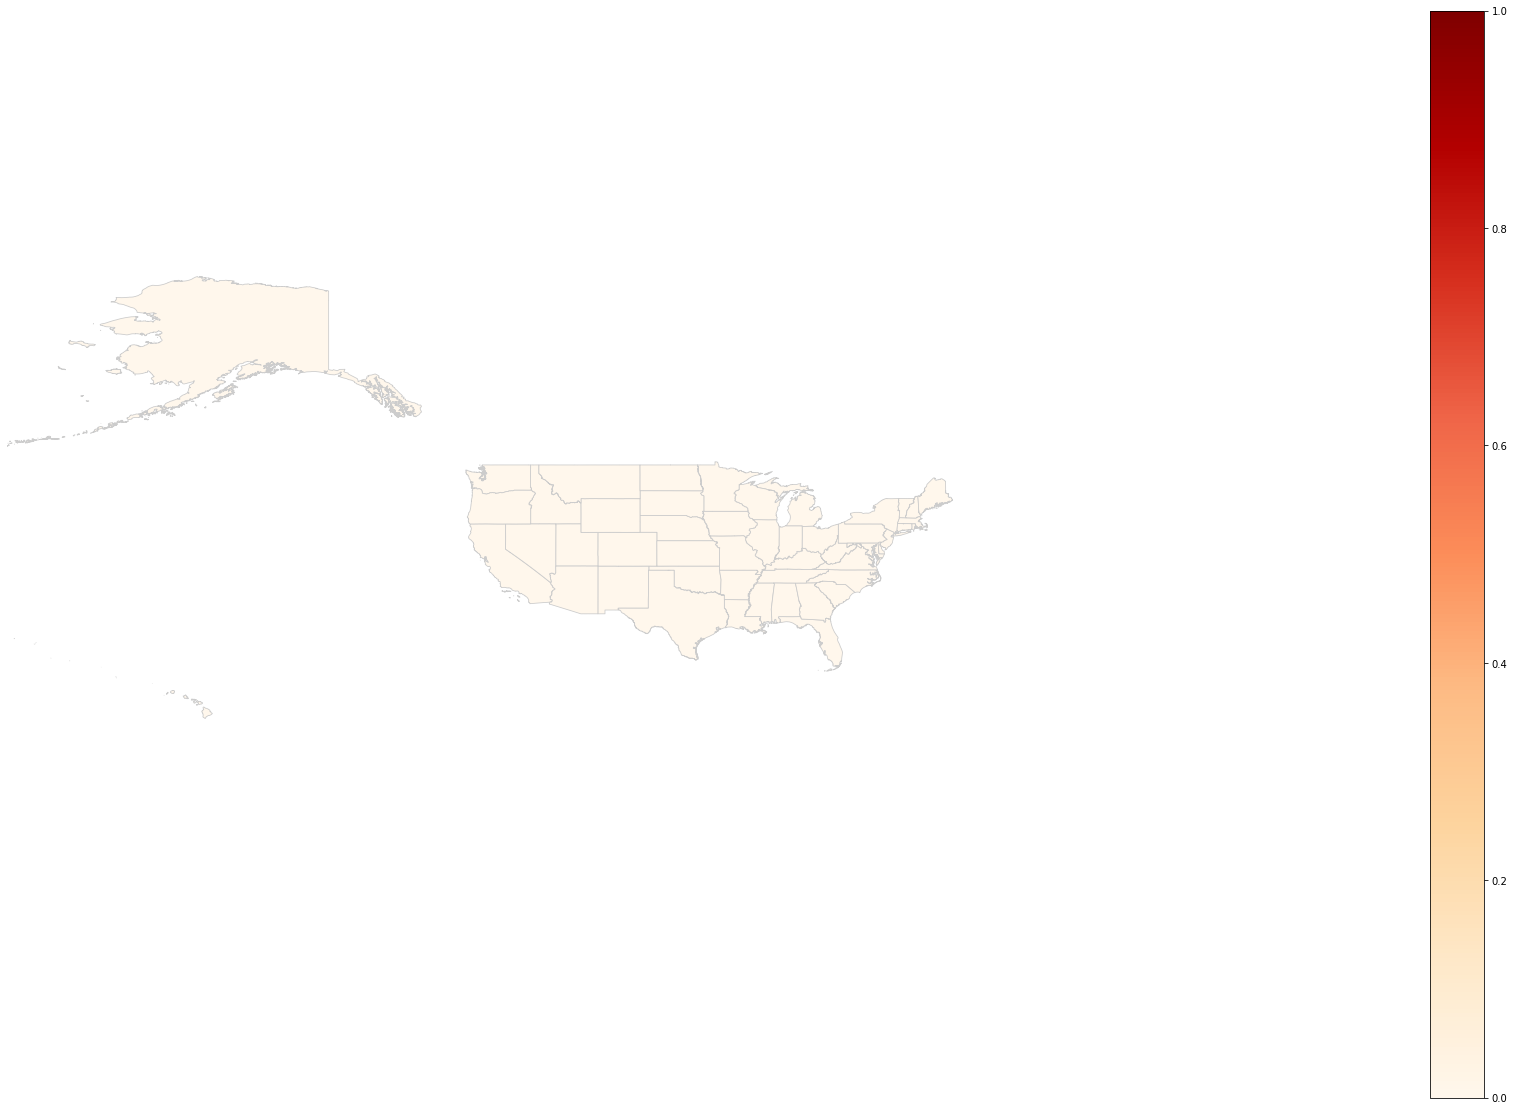

1890


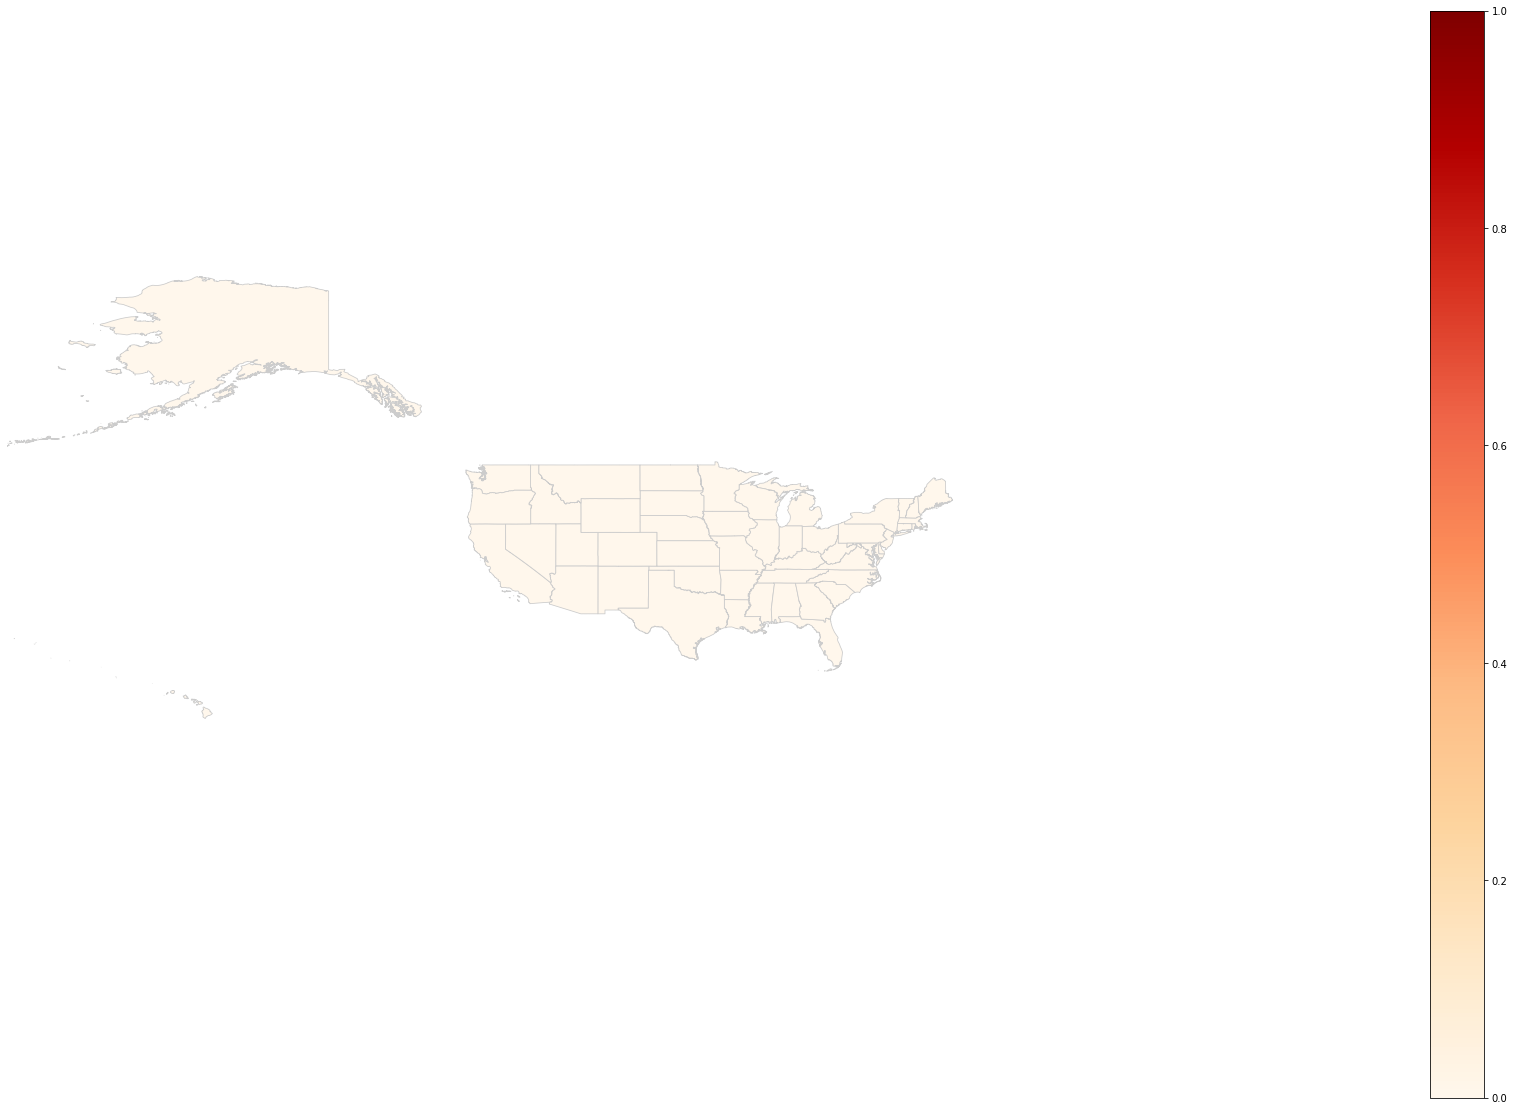

1900


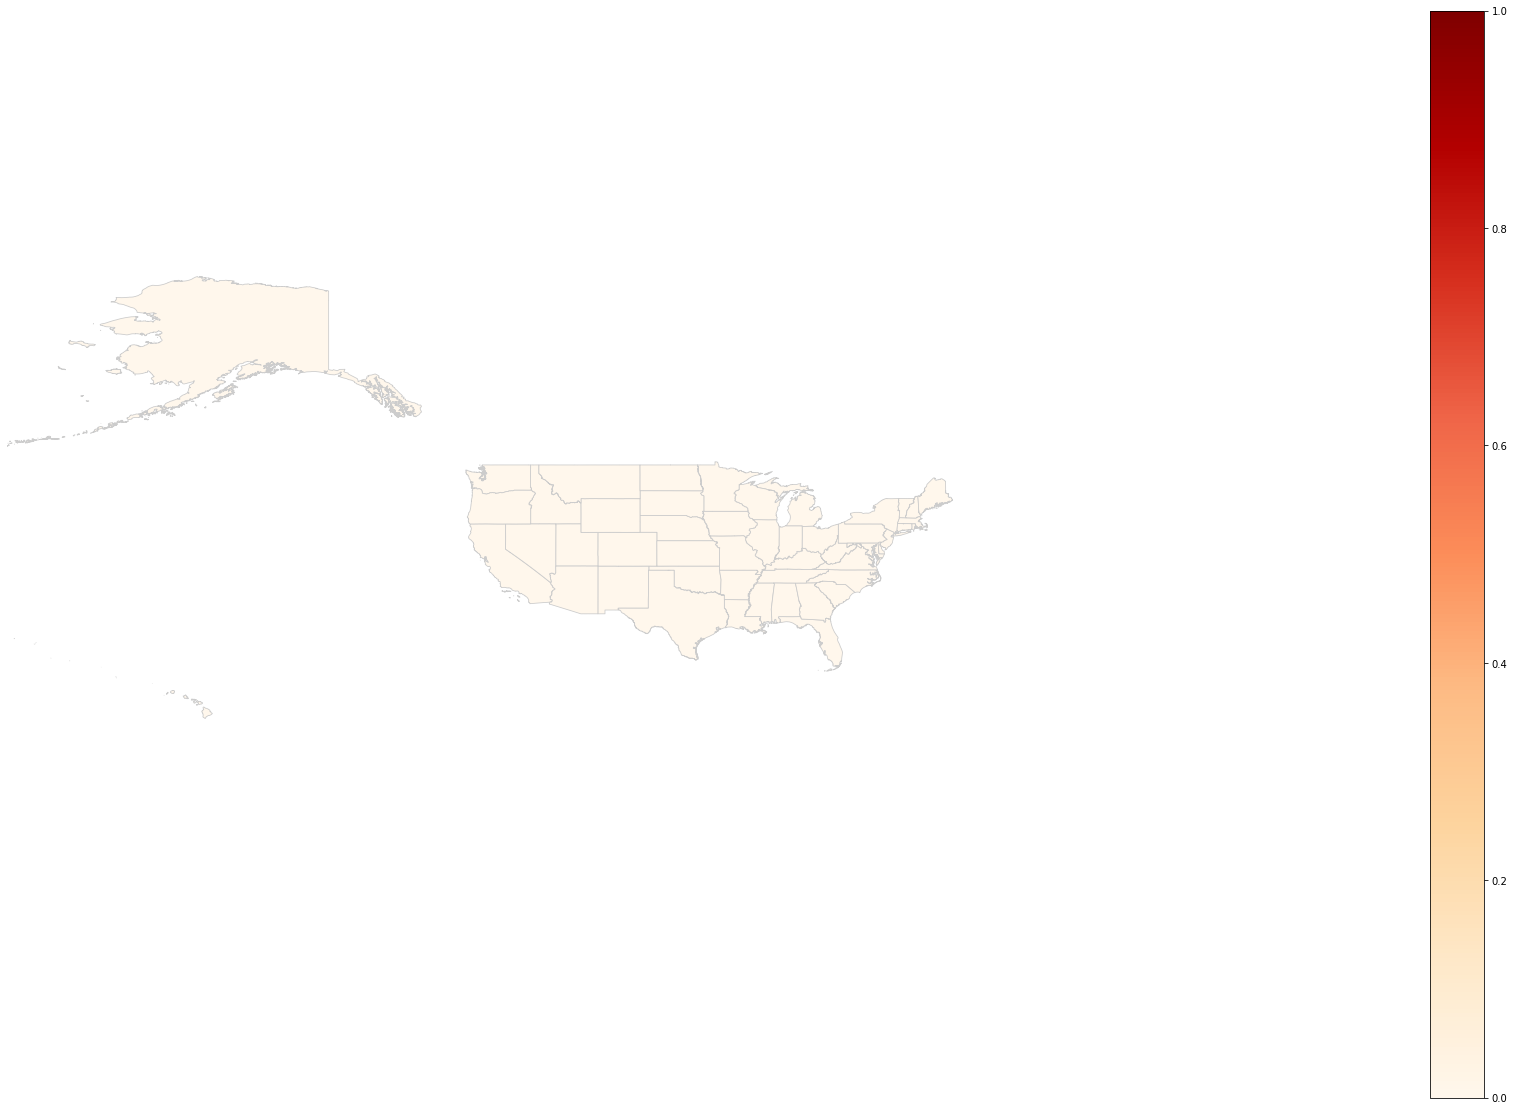

1910


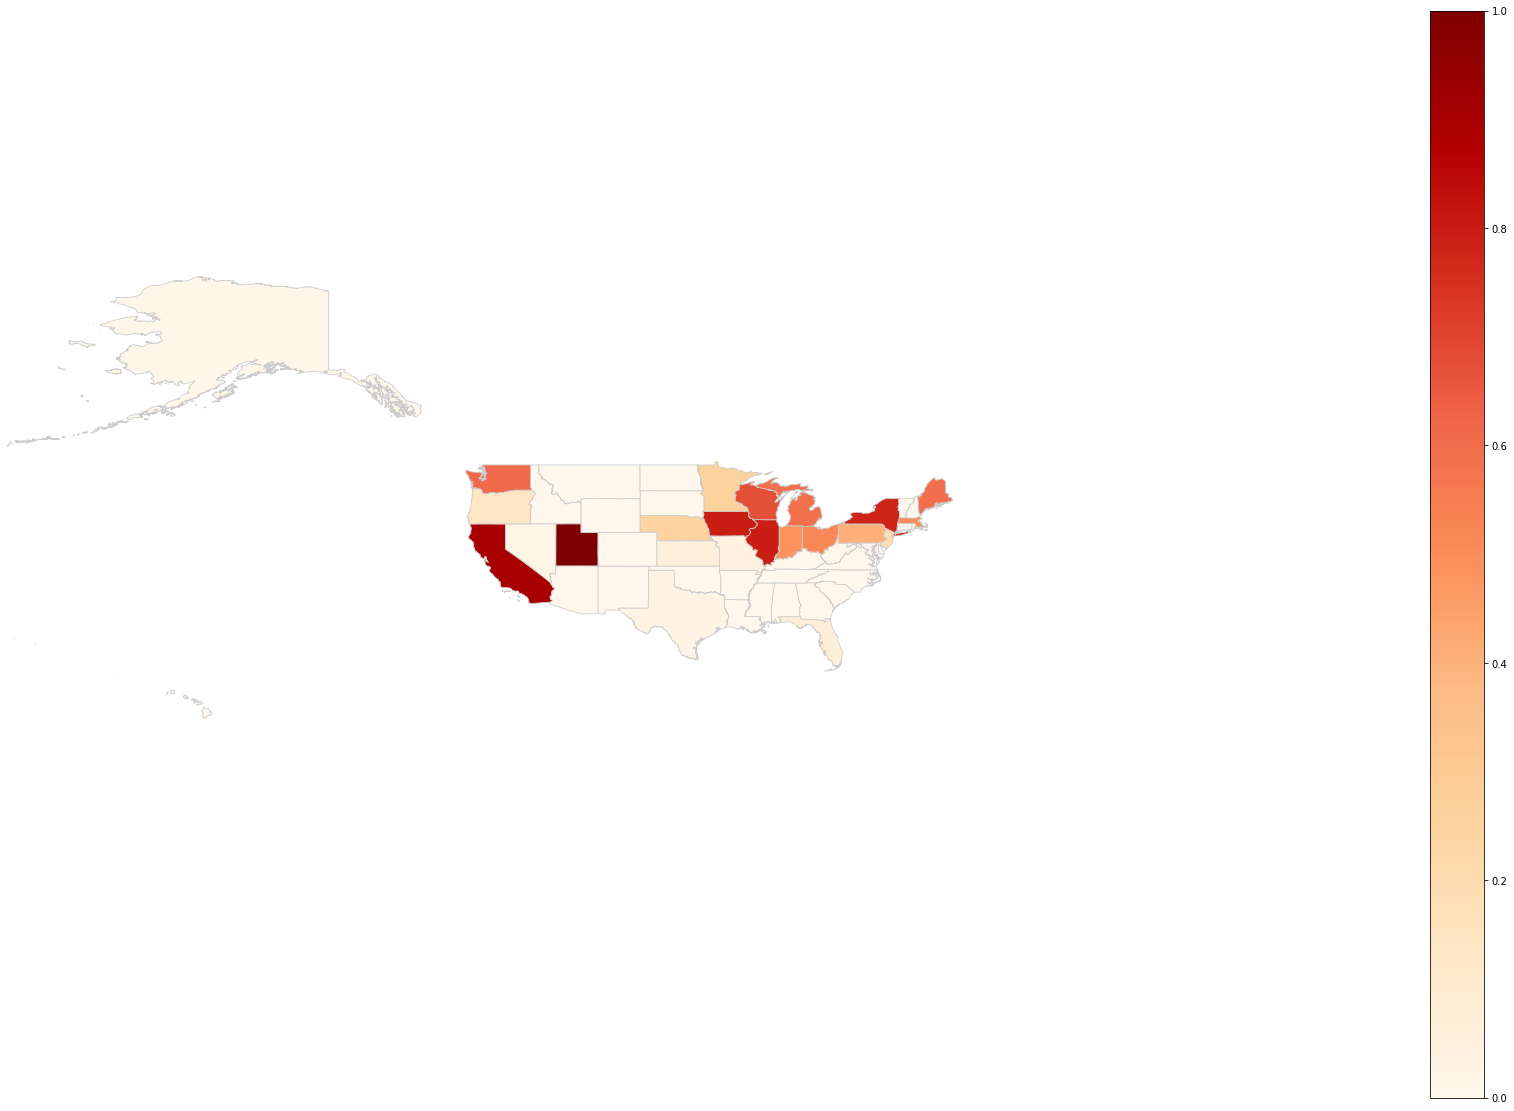

1920


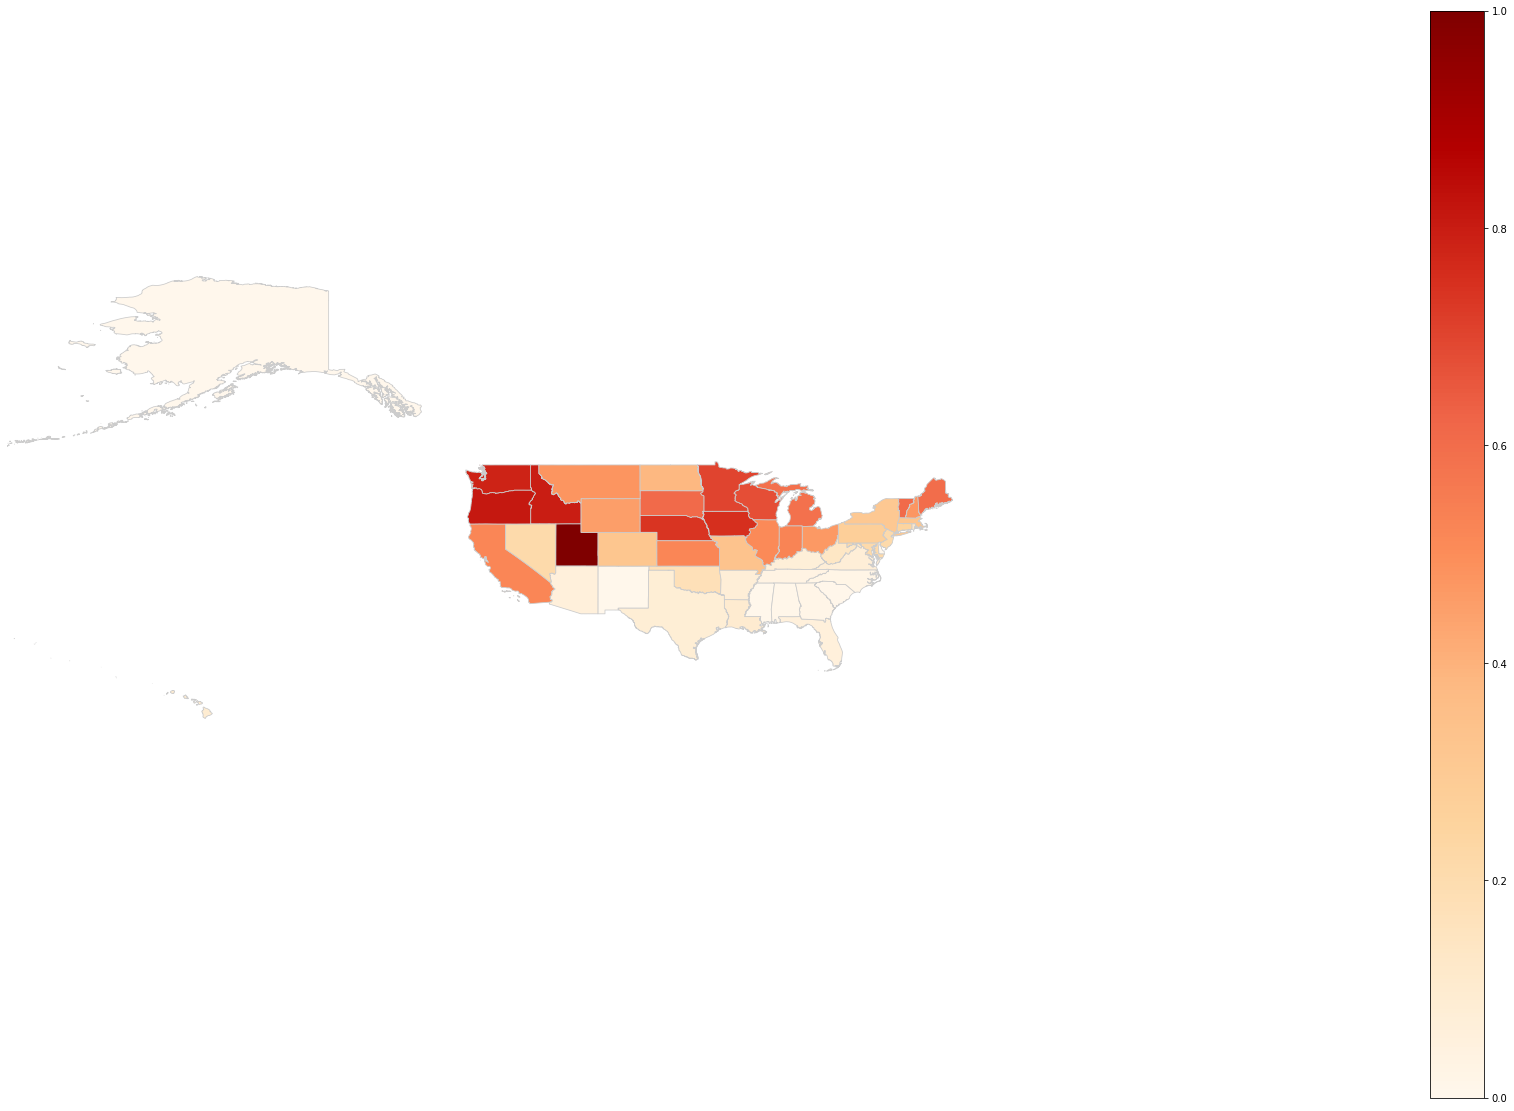

1930


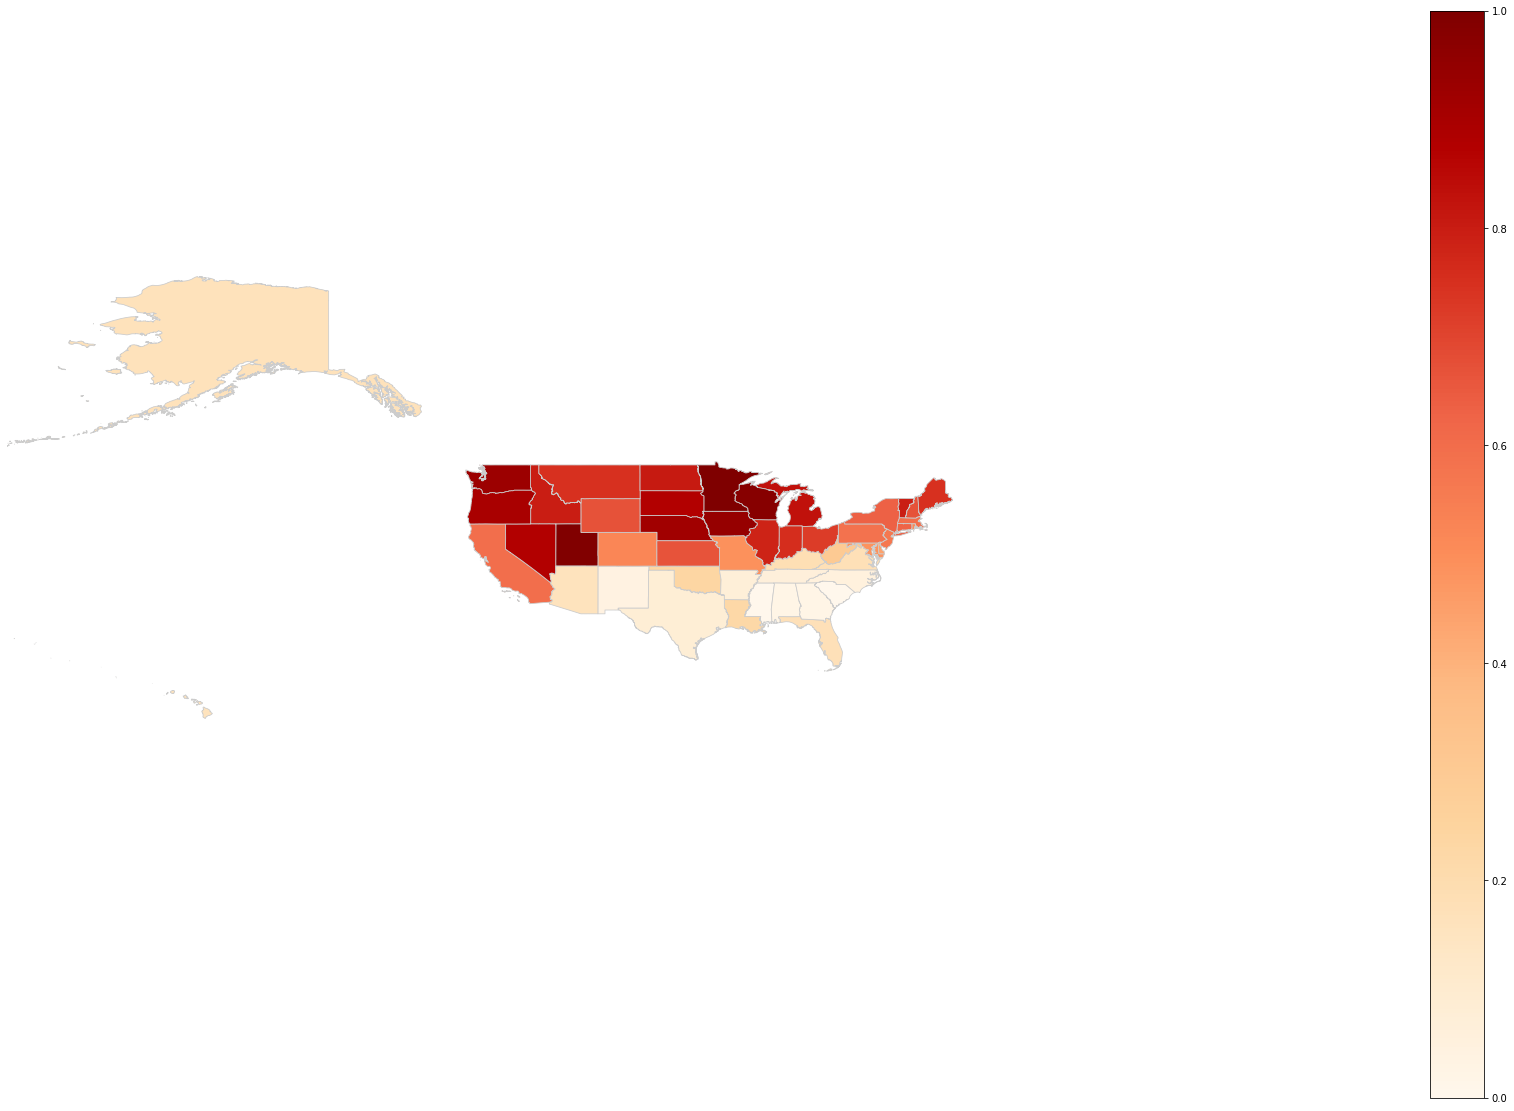

1940


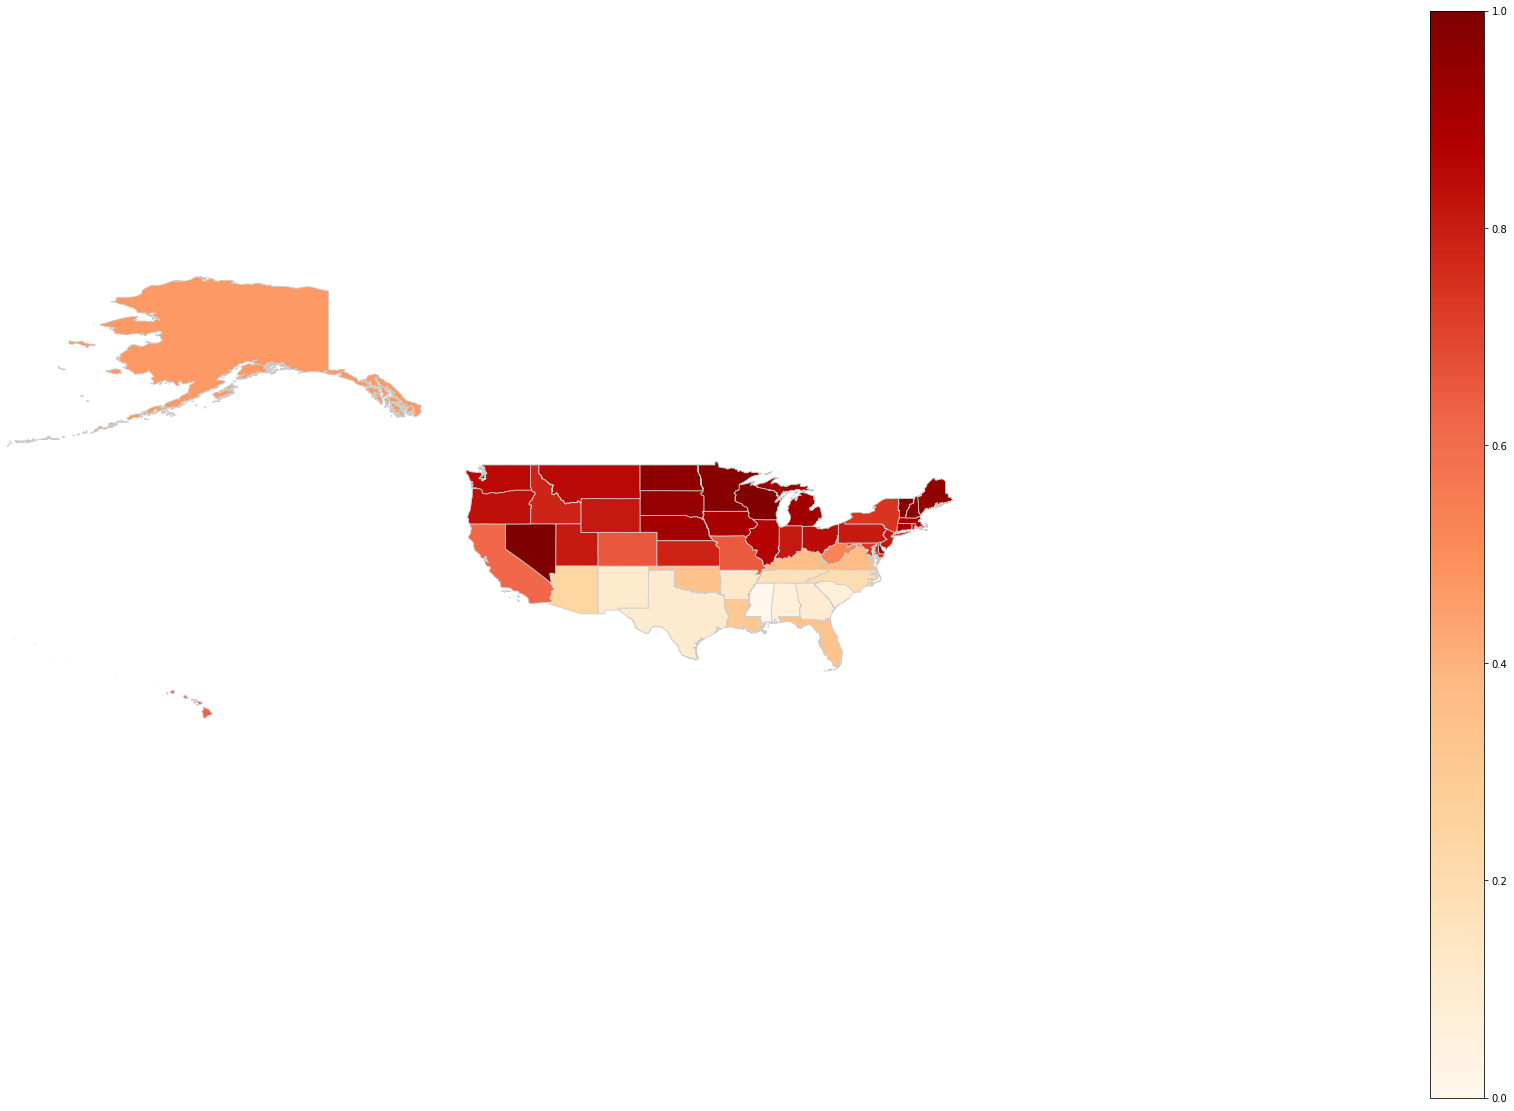

1950


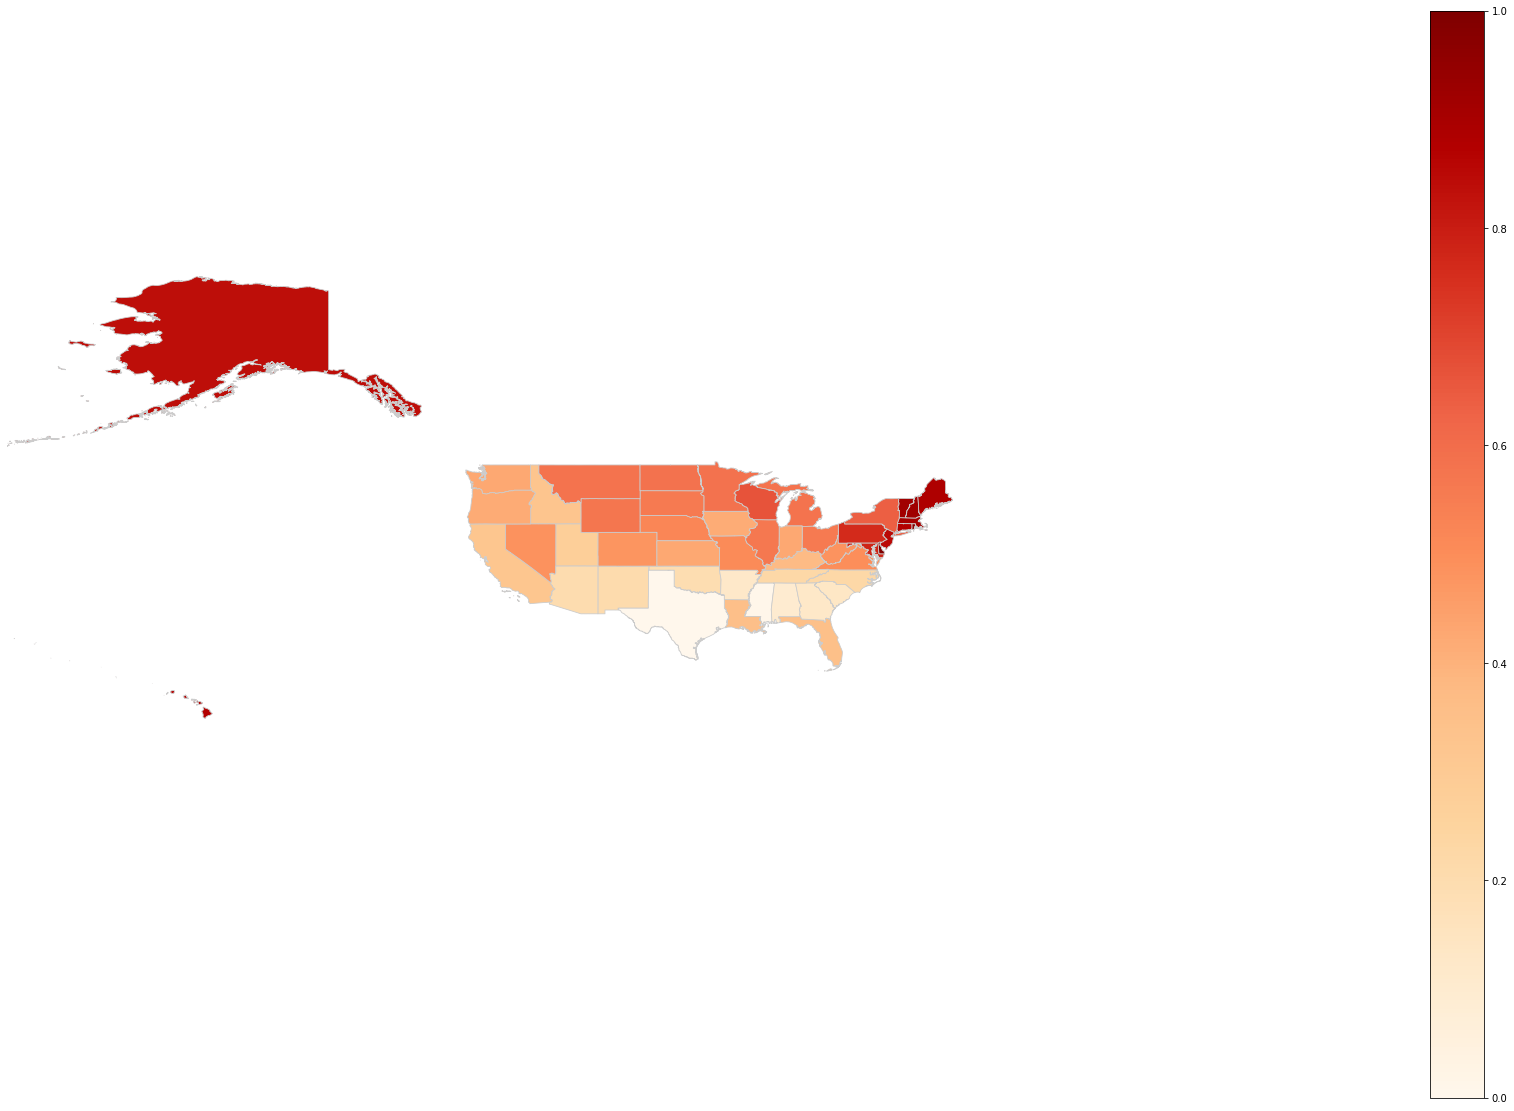

1960


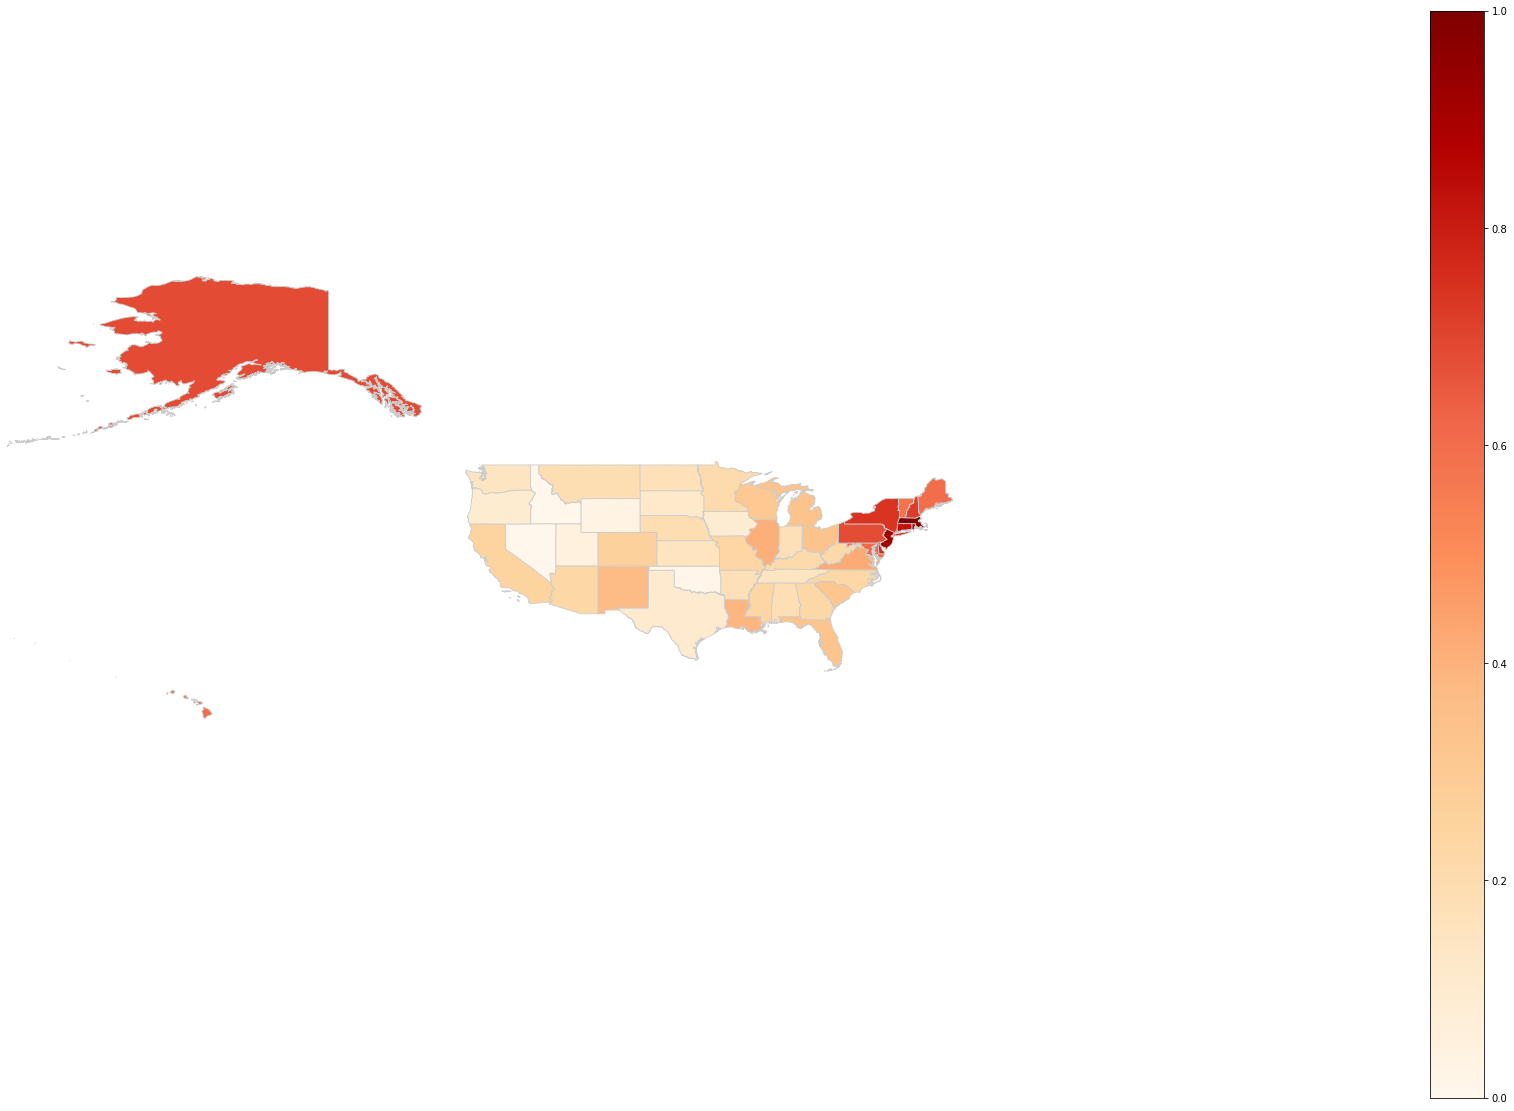

1970


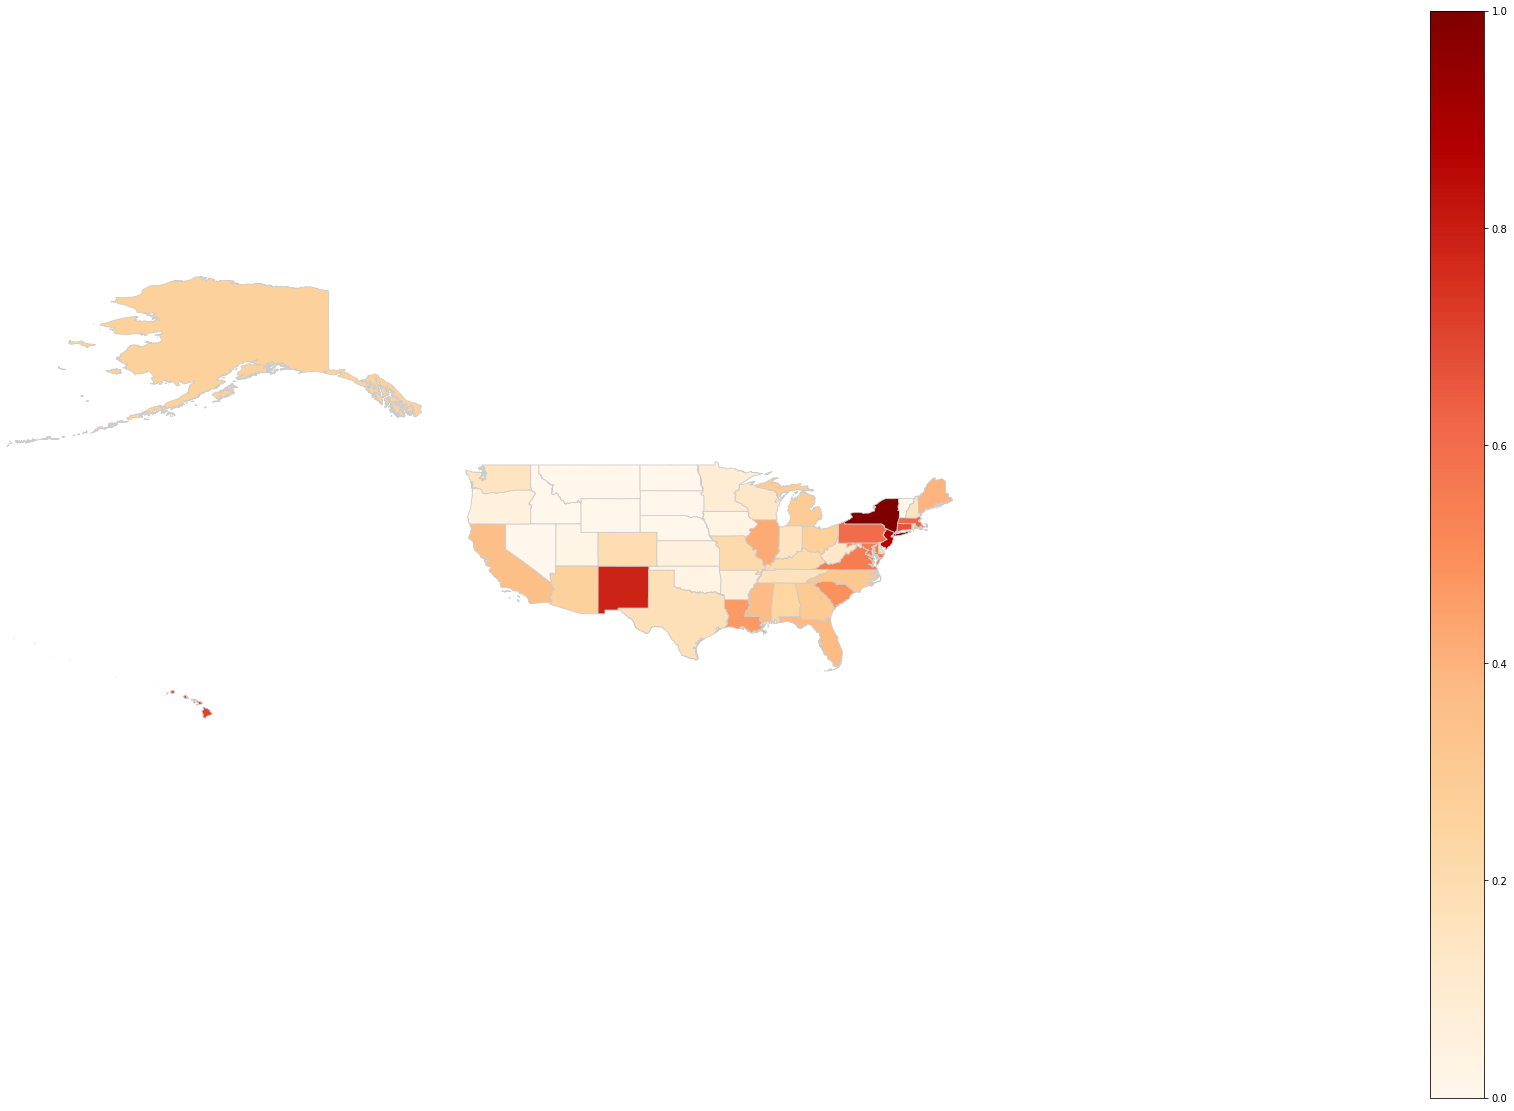

1980


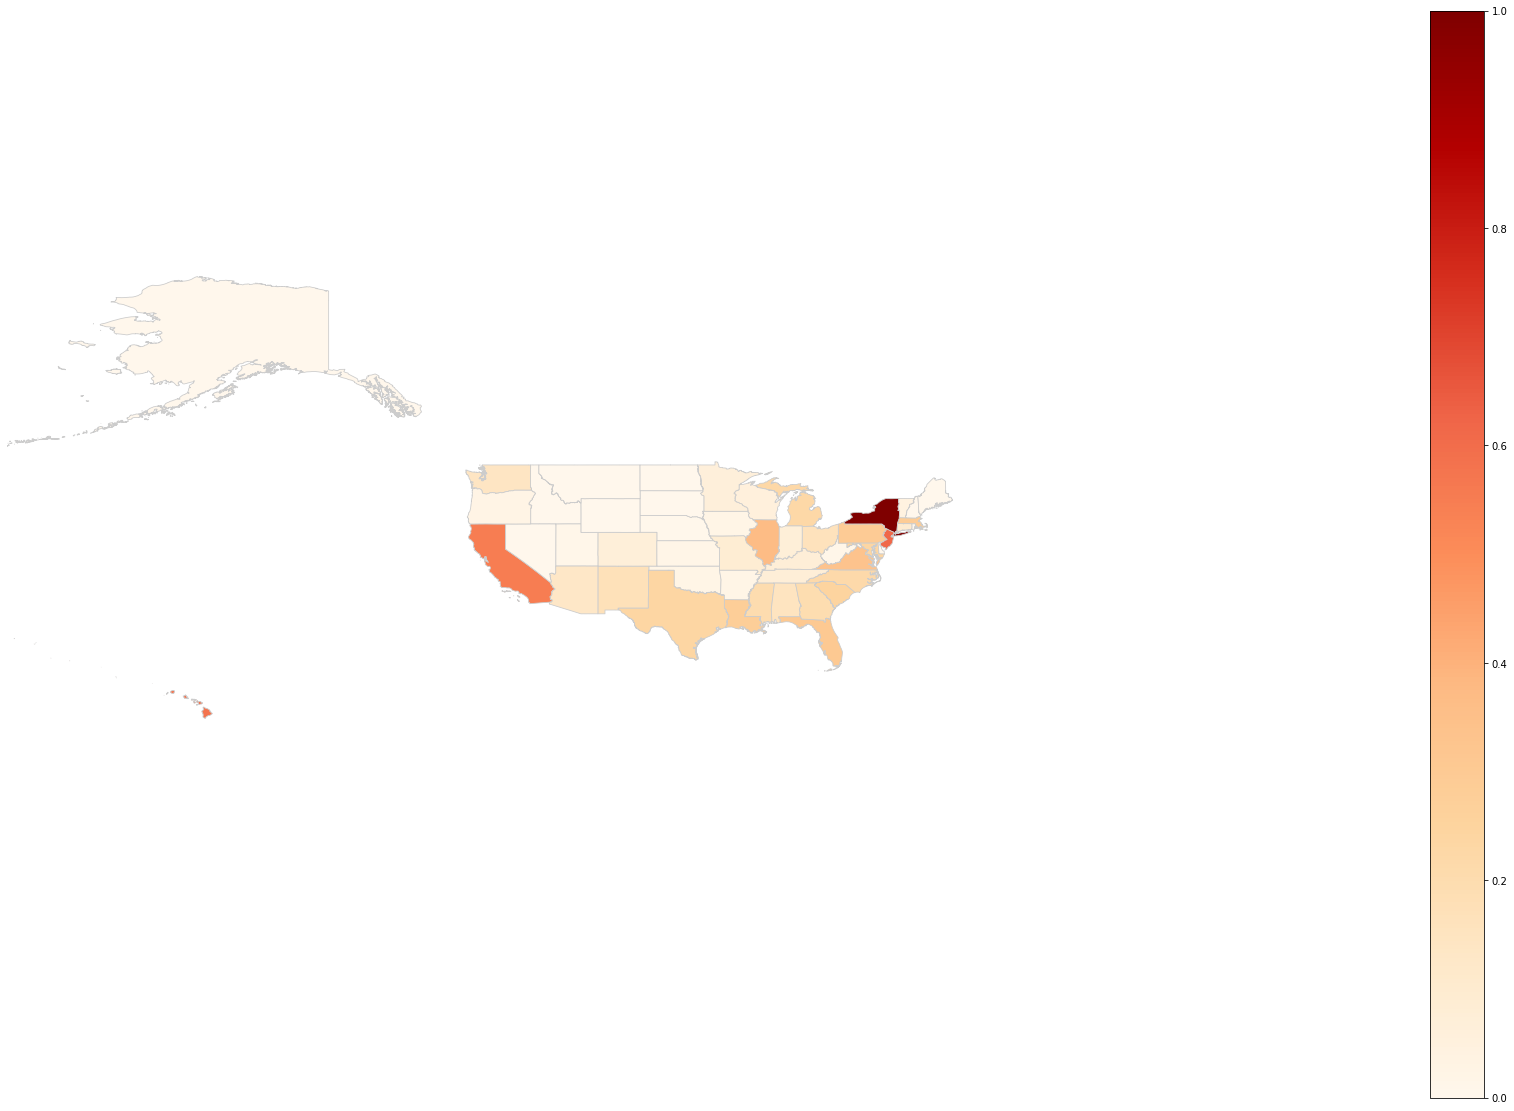

1990


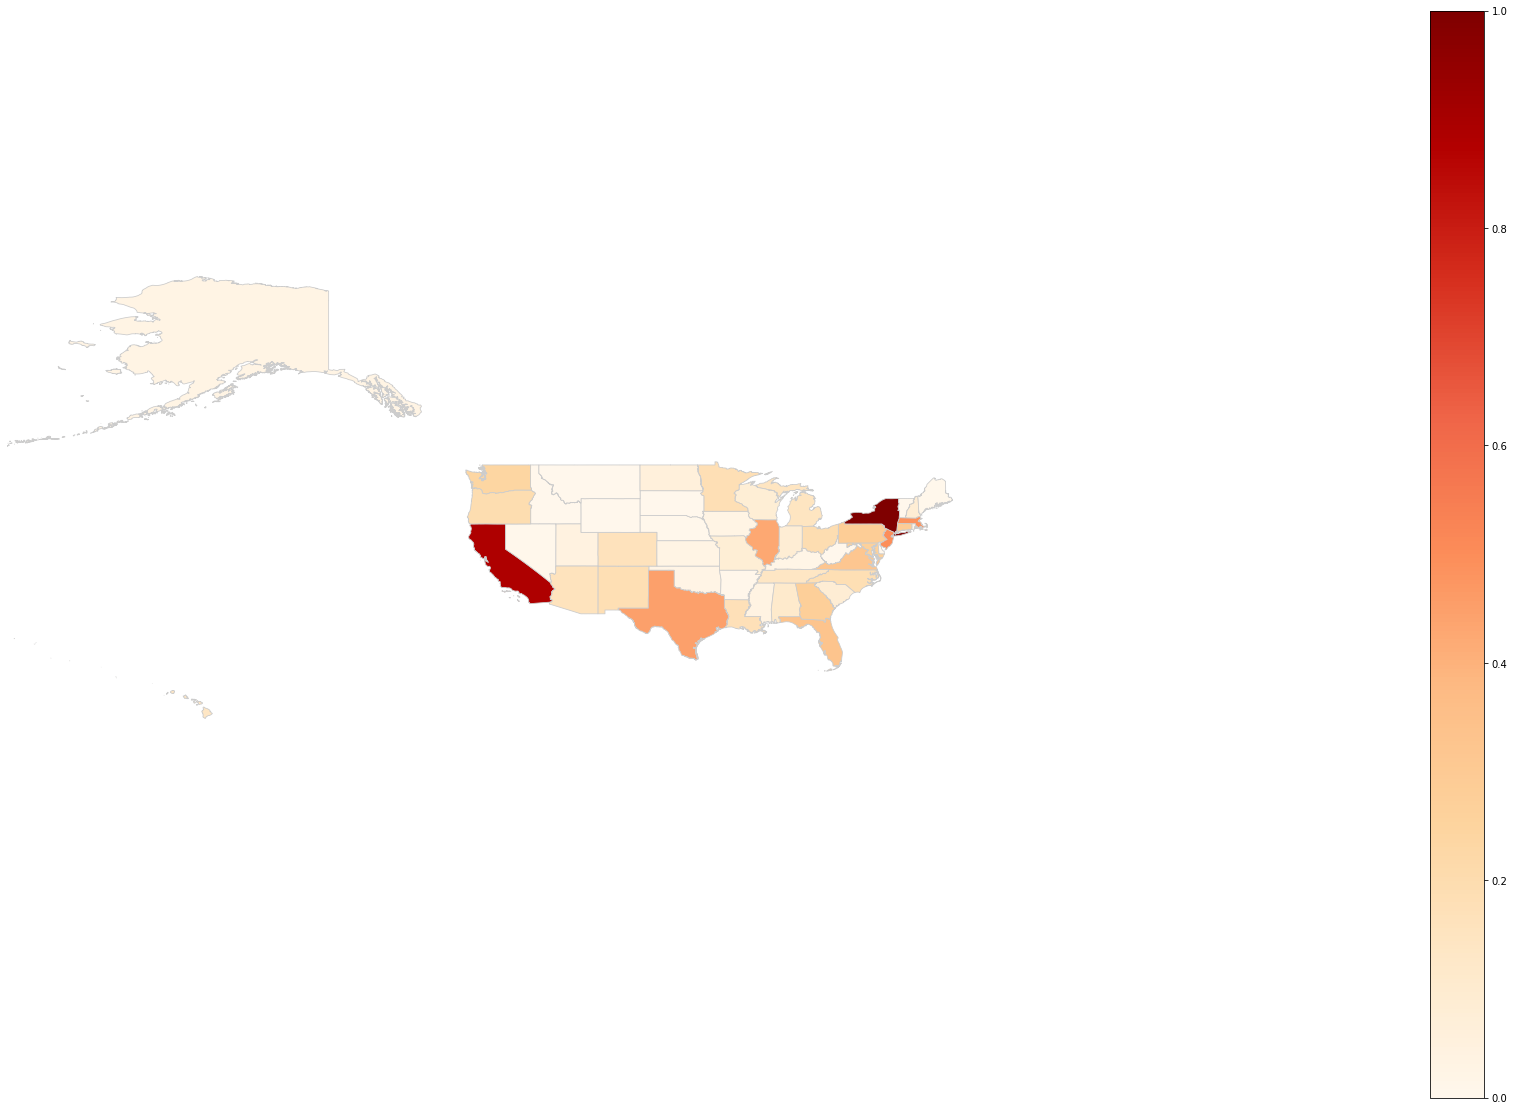

2000


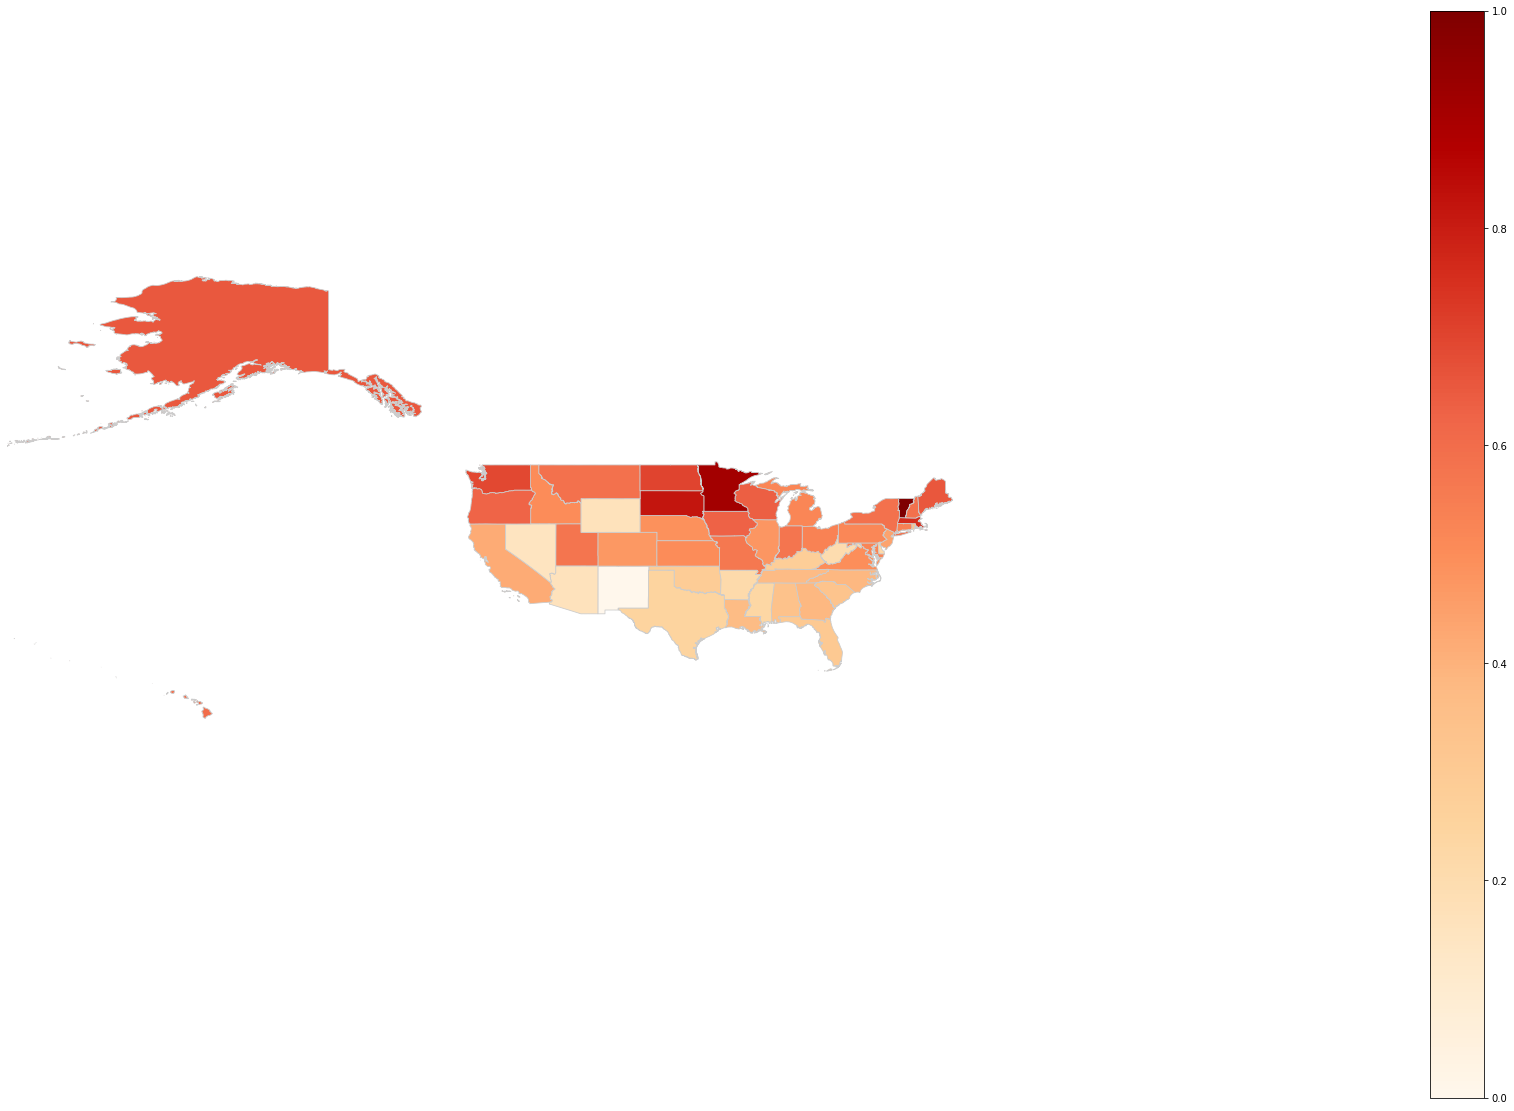

2010


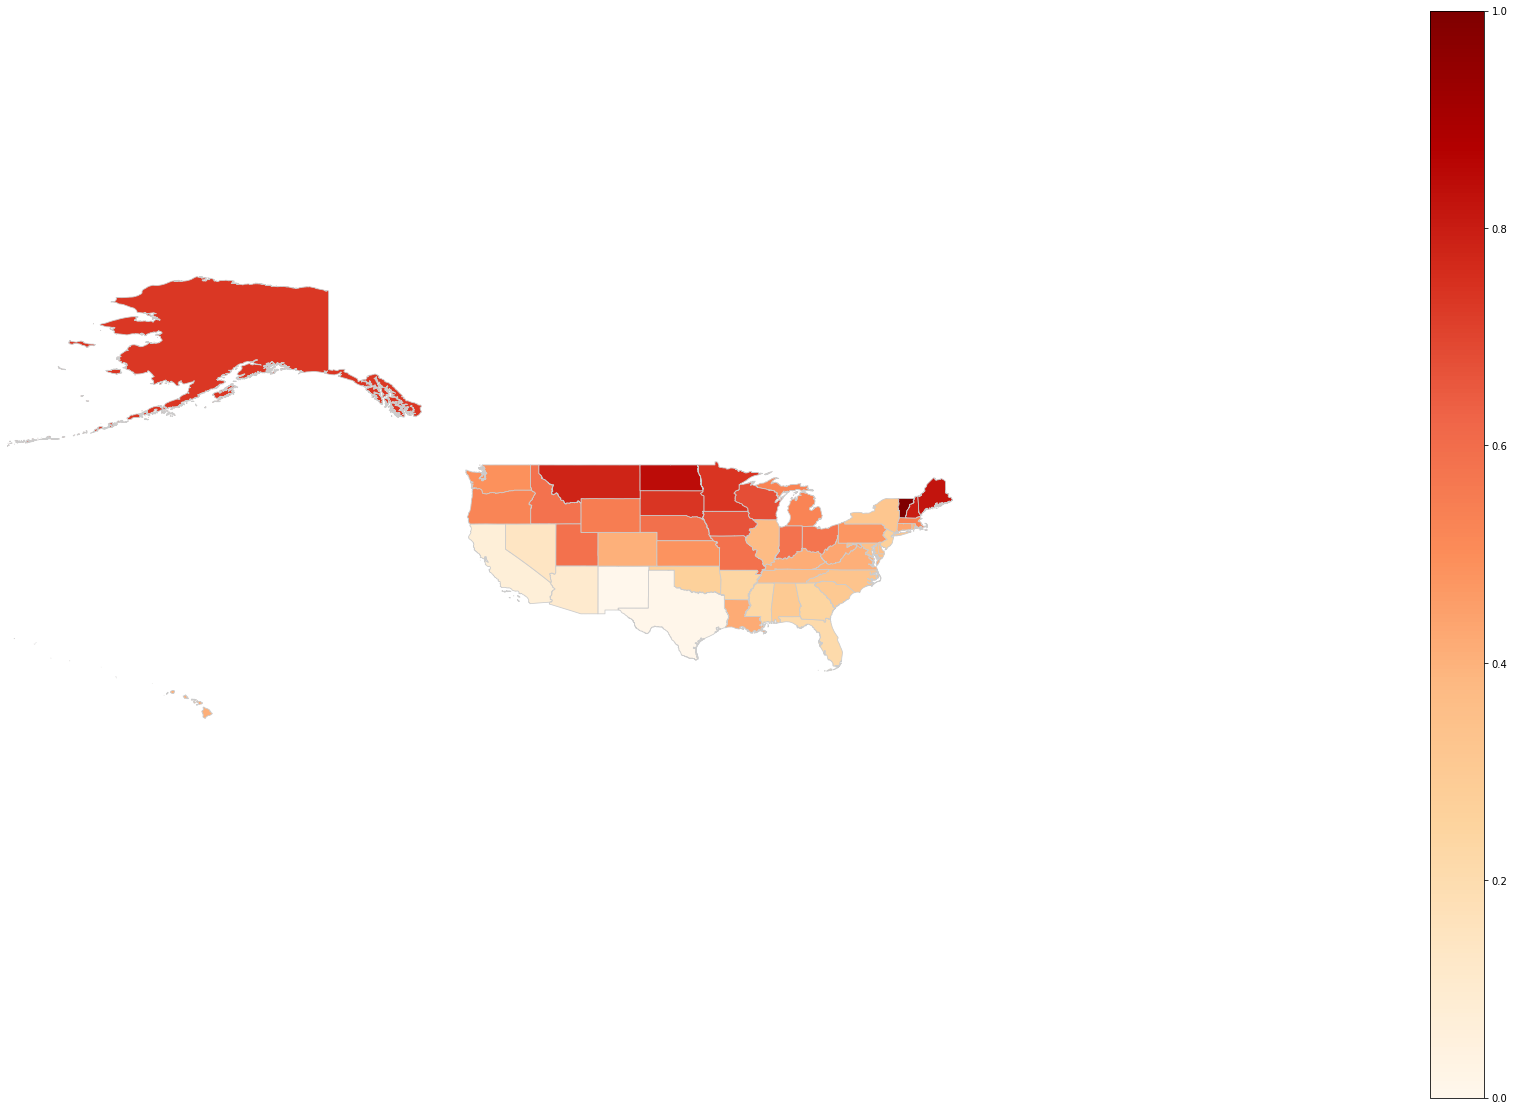

2020


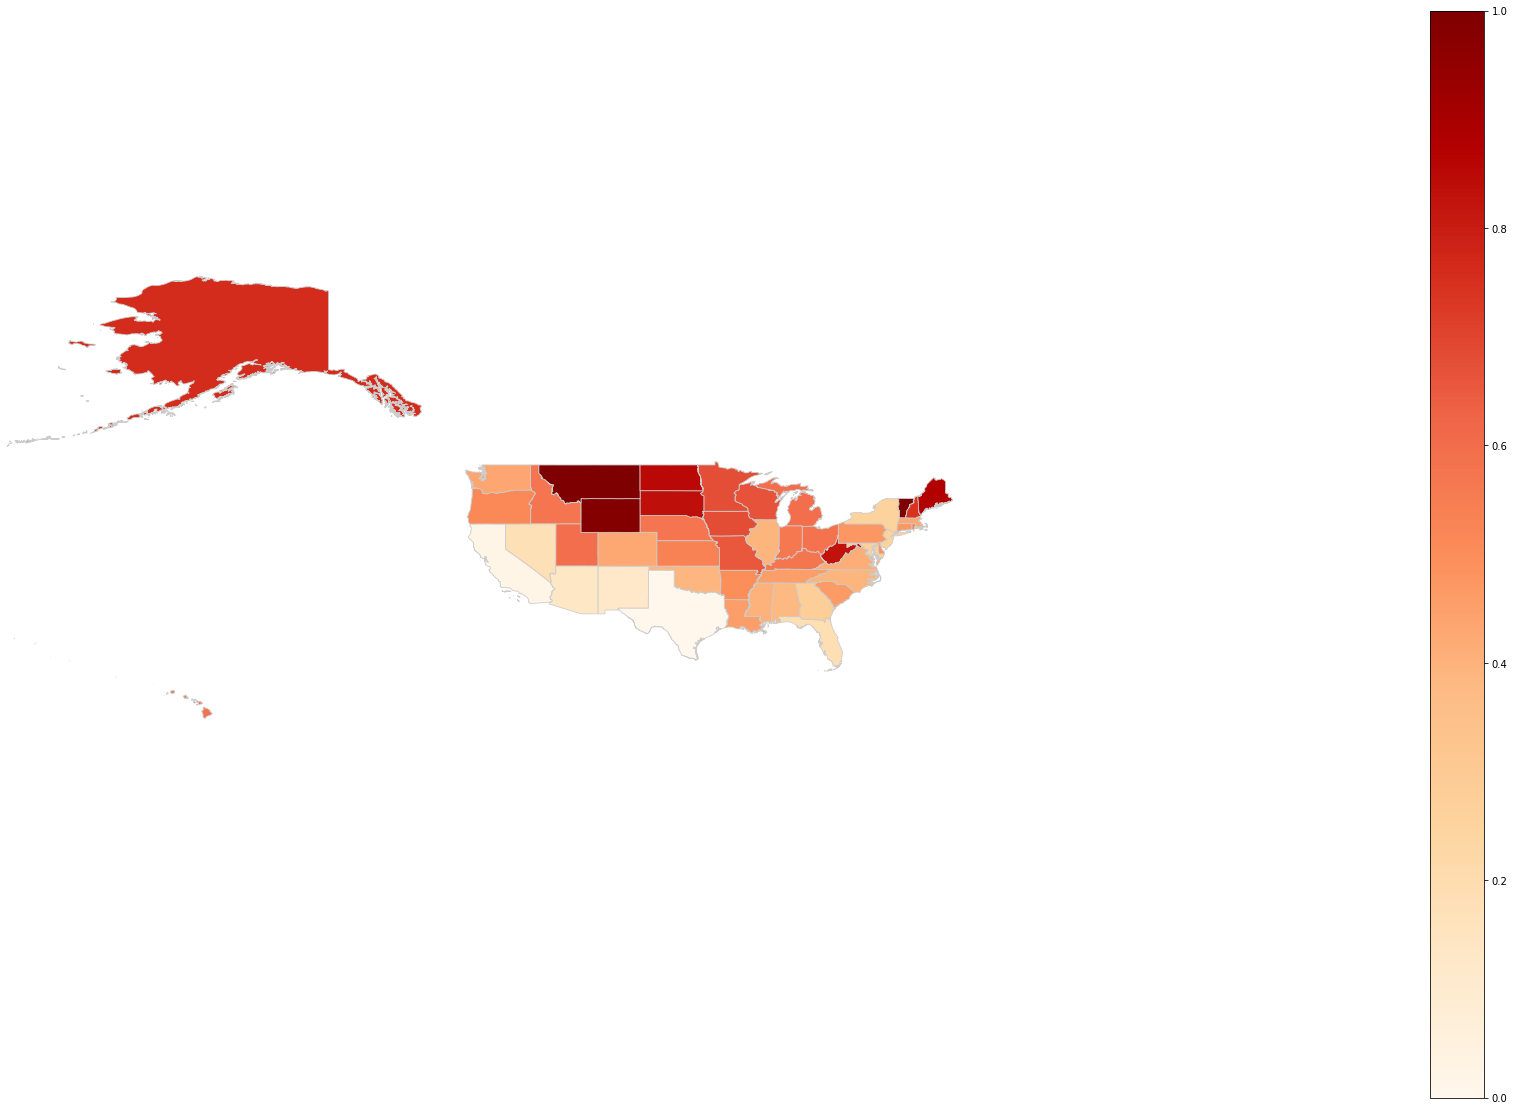

In [137]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

for i in range(15):
    time_slice_index = i
    print(1880 + i * 10)
    # Create a dictionary mapping states to their topic intensity
    state_intensity = {state: topic_intensity for state, topic_intensity in zip(states, topic_doc[time_slice_index])}

    # Load the shapefile using Geopandas
    shapefile_path =  "/Users/hanmingyang/Downloads/cb_2018_us_state_500k/cb_2018_us_state_500k.shp"
    gdf = gpd.read_file(shapefile_path)

    # Ensure the GeoDataFrame has a column with state abbreviations matching your distribution keys
    gdf['state_abbr'] = gdf['STUSPS']  # Replace 'STUSPS' with the actual column name for state abbreviations if different

    # Convert the dictionary to a DataFrame
    intensity_df = pd.DataFrame(list(state_intensity.items()), columns=['state_abbr', 'intensity'])

    # Merge the DataFrame with the GeoDataFrame
    gdf = gdf.merge(intensity_df, how='left', on='state_abbr')

    # Set the size of the plot
    fig, ax = plt.subplots(1, 1, figsize=(30, 20))

    # Plot the GeoDataFrame with intensity coloring
    gdf.plot(column='intensity', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

    # Remove the axis
    ax.axis('off')    # Set the aspect of the plot to equal and adjust the limits if needed
    ax.set_aspect('equal')
    ax.set_xlim([gdf.total_bounds[0], gdf.total_bounds[2] - 200])  # set x limits to the bounds of the shapes
    ax.set_ylim([gdf.total_bounds[1] + 20, gdf.total_bounds[3]])  # set y limits to the bounds of the shapes

    # Set the aspect of the plot to equal
    ax.set_aspect('equal')

    # Add a colorbar
    fig.colorbar(plt.cm.ScalarMappable(cmap='OrRd'), ax=ax)

    # Show the plot
    plt.show()

In [ ]:
# Normalize the topic-document distribution to get the proportions
# This assumes that the rows of topic_document_distribution correspond to documents
# and the columns correspond to topics
topic_proportions = topic_document_distribution[:, selected_topic] / np.sum(topic_document_distribution, axis=1)

# Assuming you have a list of states ordered corresponding to the documents
states = ['State1', 'State2', ...]  # This should be your actual list of states

# Create a dictionary to hold the topic proportion for each state
state_topic_proportions = {state: proportion for state, proportion in zip(states, topic_proportions)}

# Now state_topic_proportions contains each state's proportion of the selected topic at the specified time

In [42]:
topic_distribution

[(0.024912589198315738, 'Mary_F'),
 (0.016576340885326574, 'John_M'),
 (0.014080898482409511, 'William_M'),
 (0.013484124902780741, 'James_M'),
 (0.010463920040276766, 'Helen_F'),
 (0.010438630988060187, 'Robert_M'),
 (0.009784257724965207, 'Joseph_M'),
 (0.008451553800225319, 'Margaret_F'),
 (0.00842877025248656, 'Charles_M'),
 (0.007746827936900011, 'Dorothy_F'),
 (0.007002107753442149, 'George_M'),
 (0.006909166702368957, 'Mildred_F'),
 (0.006727895075895577, 'Anna_F'),
 (0.006658598448388015, 'Florence_F'),
 (0.006543477087325221, 'Michael_M'),
 (0.006533042133362343, 'Marie_F'),
 (0.0065204067650692634, 'Elizabeth_F'),
 (0.006490331007057511, 'Ruth_F'),
 (0.00631378382957992, 'Ethel_F'),
 (0.006123951014684219, 'Thomas_M'),
 (0.006055591950832268, 'Gertrude_F'),
 (0.005996297089796453, 'Rose_F'),
 (0.005829933529804919, 'Alice_F'),
 (0.0058120025974331855, 'Frances_F'),
 (0.005658905444986299, 'Bertha_F'),
 (0.005556225994448857, 'Thelma_F'),
 (0.005502714015382897, 'Edna_F'),
 (0